In [50]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [51]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\mushroom.csv")
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

# Task 1: Exploratory Data Analysis (EDA)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_features = data.columns[:4]  


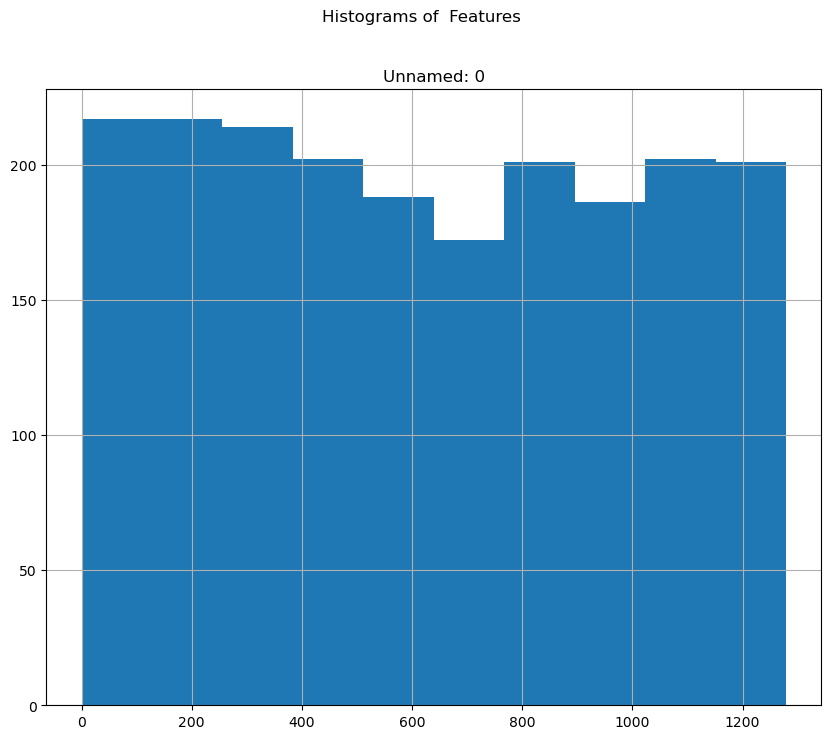

In [55]:
# Histograms 
data[selected_features].hist(figsize=(10, 8))
plt.suptitle('Histograms of  Features')
plt.show()

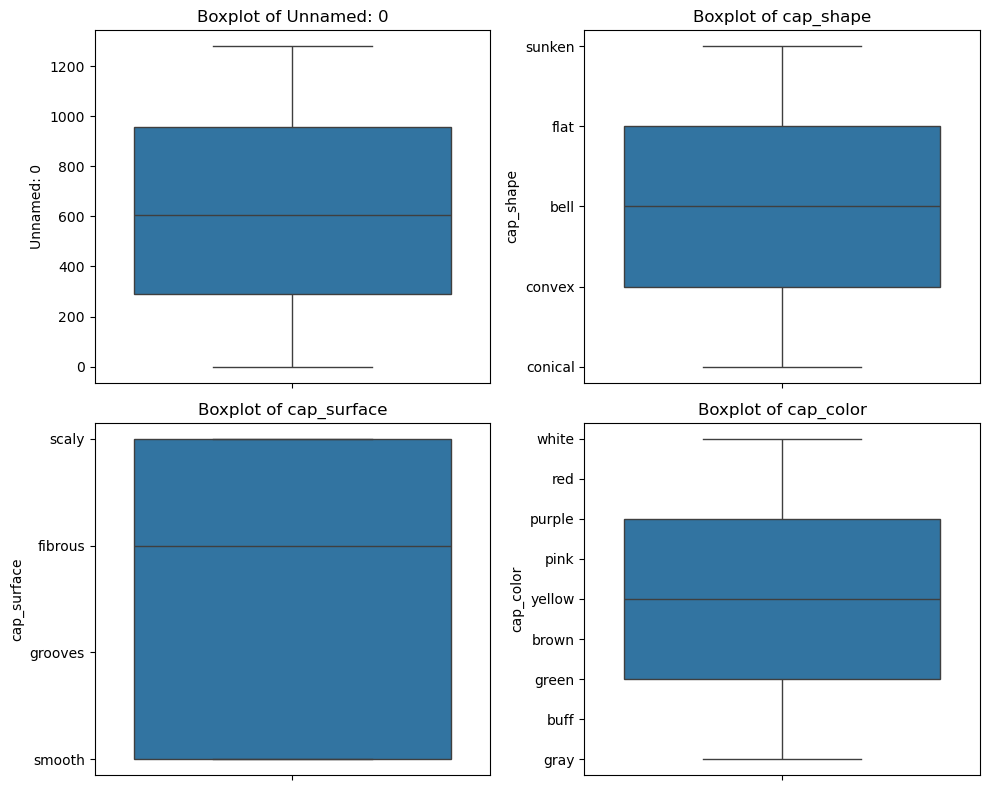

In [56]:
# Box plots 
plt.figure(figsize=(10, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [57]:

from sklearn.preprocessing import LabelEncoder
encoded_data = data.apply(LabelEncoder().fit_transform)

In [58]:
#correlation matrix
correlation_matrix = encoded_data.corr()

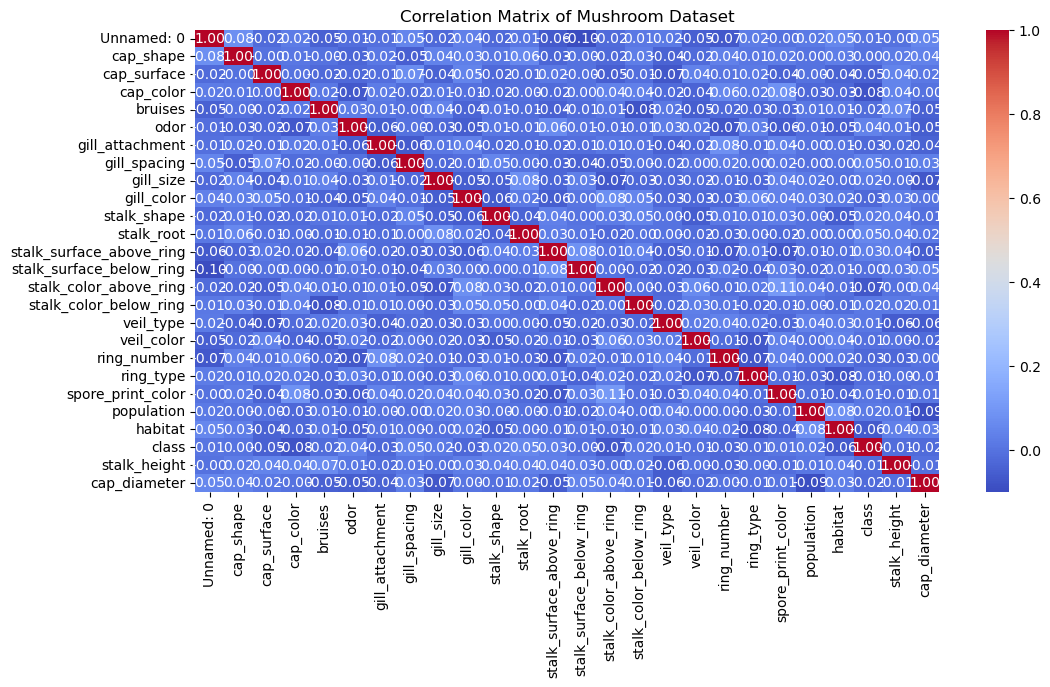

In [59]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()

# Task 2: Data Preprocessing

In [61]:
from sklearn.model_selection import train_test_split
X = encoded_data.drop(columns=[encoded_data.columns[0]]) 
y = encoded_data[encoded_data.columns[0]] 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print( X_train.shape,  y_train.shape)
print(X_test.shape,  y_test.shape)


(1600, 25) (1600,)
(400, 25) (400,)


# Task 3: Data Visualization

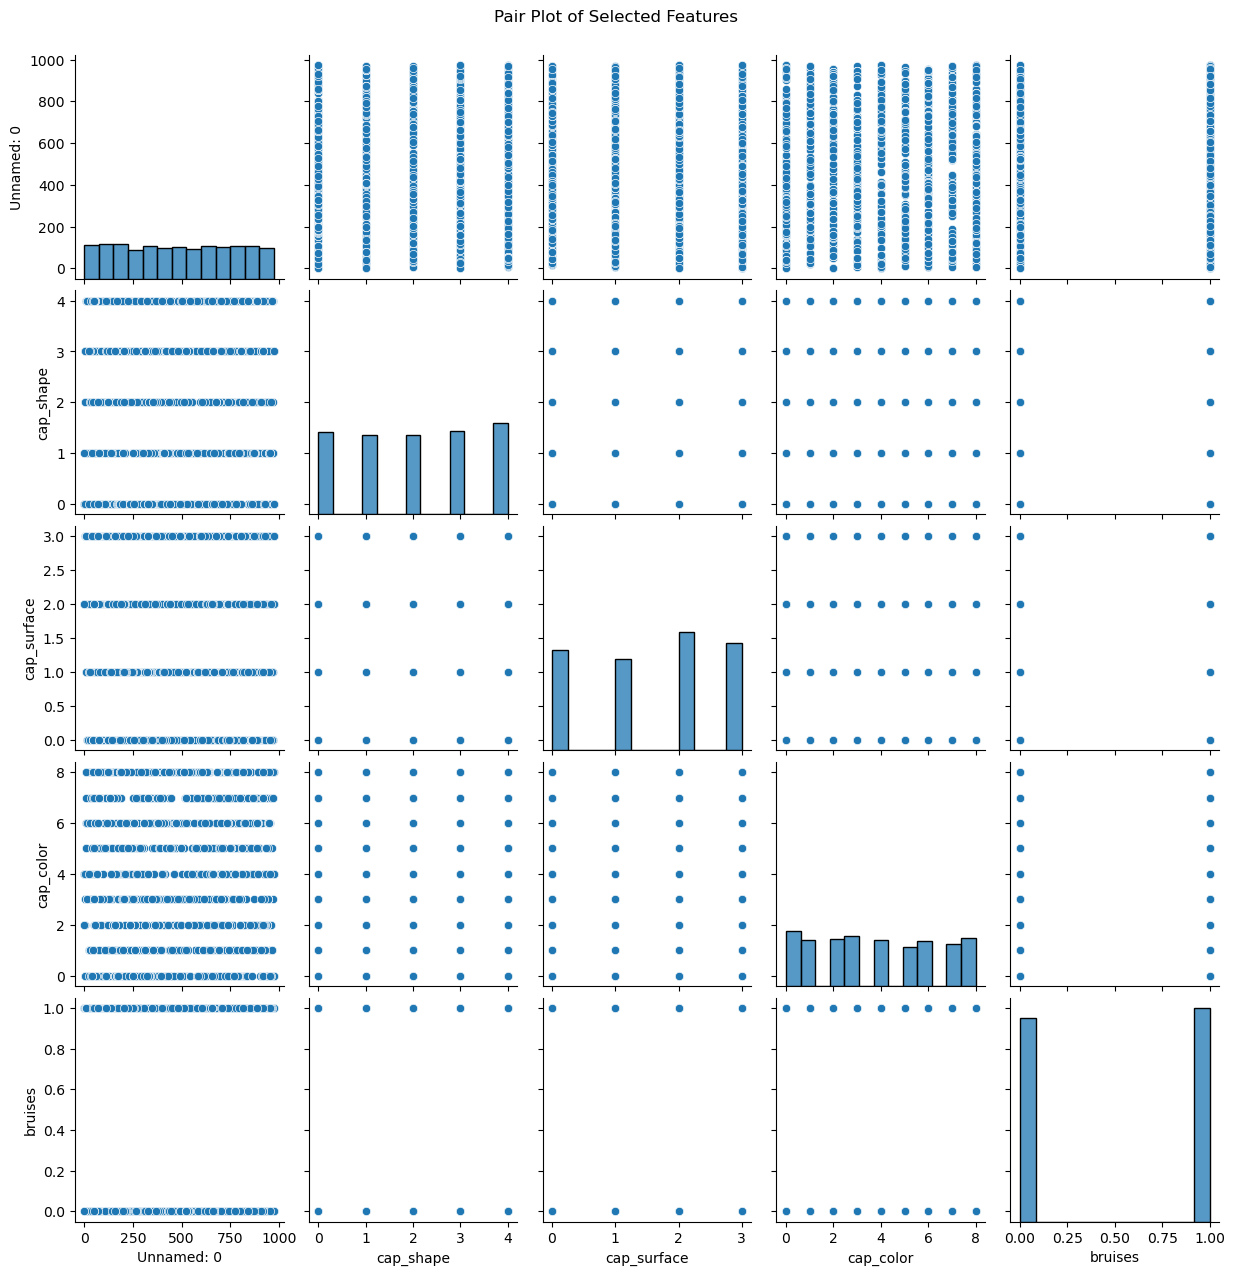

In [64]:
#pair plot
selected_features = encoded_data.columns[:5]  
sns.pairplot(encoded_data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


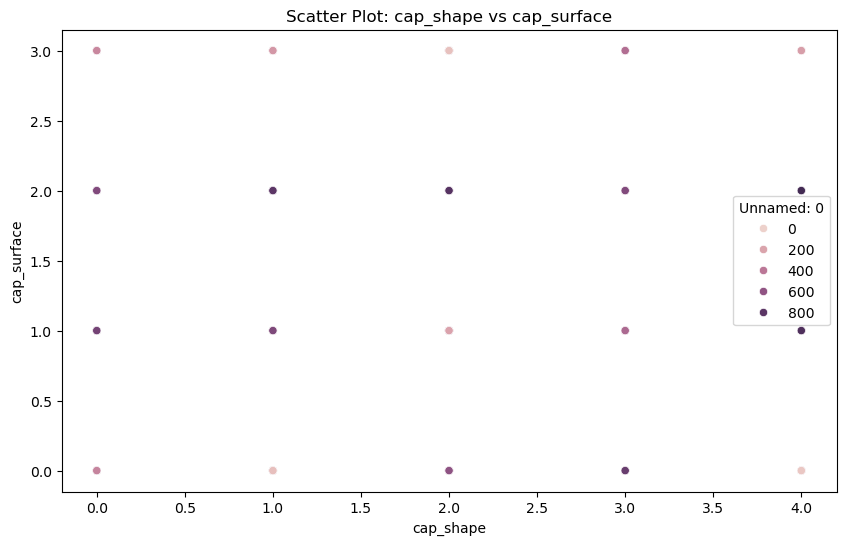

In [65]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=encoded_data[selected_features[1]], y=encoded_data[selected_features[2]], hue=encoded_data[encoded_data.columns[0]])
plt.title(f'Scatter Plot: {selected_features[1]} vs {selected_features[2]}')
plt.show()


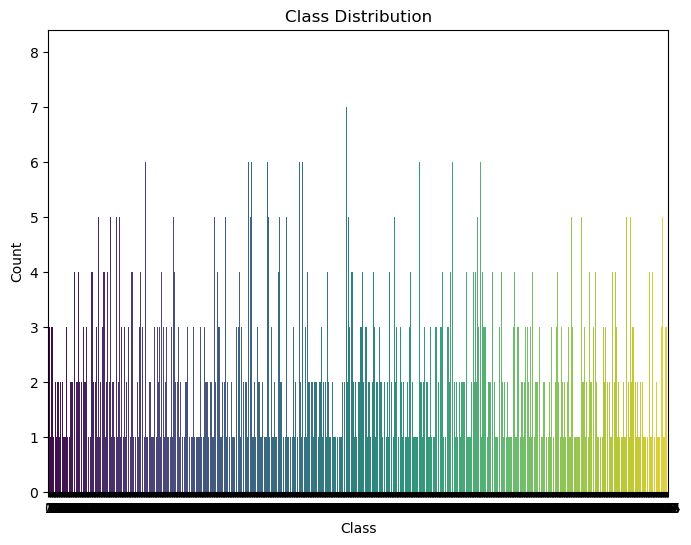

In [66]:
# Visualizing the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Task 4: SVM Implementation

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_classifier = SVC(kernel='linear', random_state=7)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=7)

In [69]:
y_pred = svm_classifier.predict(X_test)

In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.7250
Precision: 0.6906
Recall: 0.7250
F1-Score: 0.7019


# Task 5: Visualization of SVM Results

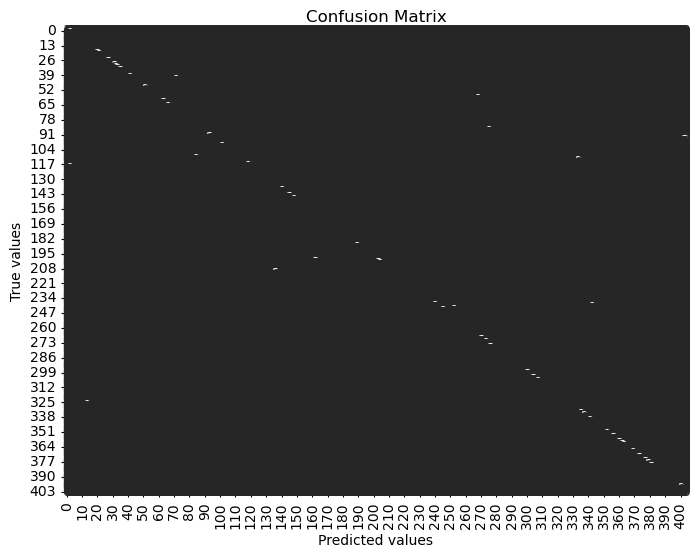

In [79]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

# Task 6: Parameter Tuning and Optimization

In [80]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10,]
}

In [86]:
from sklearn.model_selection import GridSearchCV
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.4f}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7219


In [88]:
best_model = grid_search.best_estimator_
best_model

SVC(C=0.1, kernel='linear', random_state=42)

In [89]:
y_pred_best = best_model.predict(X_test)


In [98]:
from sklearn.metrics import precision_score,recall_score,f1_score
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Print the results
print(f'Optimized Model Accuracy: {accuracy_best:.4f}')
print(f'Optimized Model Precision: {precision_best:.4f}')
print(f'Optimized Model Recall: {recall_best:.4f}')
print(f'Optimized Model F1-Score: {f1_best:.4f}')

Optimized Model Accuracy: 0.7250
Optimized Model Precision: 0.6906
Optimized Model Recall: 0.7250
Optimized Model F1-Score: 0.7019


# Task 7: Comparison and Analysis

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = svm_classifier.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    


Kernel: linear
Accuracy: 0.7250
Precision: 0.6906
Recall: 0.7250
F1-Score: 0.7019

Kernel: poly
Accuracy: 0.0225
Precision: 0.0033
Recall: 0.0225
F1-Score: 0.0056

Kernel: rbf
Accuracy: 0.0075
Precision: 0.0028
Recall: 0.0075
F1-Score: 0.0030


# strengths and weaknesses for the Mushroom dataset based on EDA 

strengths:

The Mushroom dataset consists of numerous categorical features, which, after encoding, turn into a high-dimensional space. 
SVMs perform well in such spaces by finding the optimal hyperplane that maximizes the margin between classes.

weaknesses:

SVMs can be computationally expensive, especially with large datasets or when using non-linear kernels like RBF or polynomial. The Mushroom dataset, if large, might lead to longer training times and higher computational costs.

# practical implications of SVM in real-world 
SVMs are commonly used in natural language processing (NLP) for tasks such as sentiment analysis, spam detection, and topic modeling. 
They lend themselves to these data as they perform well with high-dimensional data. 
SVMs are applied in image classification tasks such as object detection and image retrieval.